| 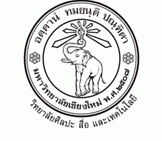 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          |        <em><font size=5>Department of Modern Management and <br> Information Technology </font></em><br>  <font size=3>College of Arts, Media and Technology,<br> Chiang Mai University<br></font> Midterm Examination, Academic Year 2021 <br> Business Data Mining 954471
|:- |-: 
|<strong>October 18th, 2021 8:00 - 23:59 </strong>| <strong>(Total 35 Points) </strong>

<b>Name__Apigorn_Pornrattanapitak______________________________________________________________      Student ID__622110240_____________________________________________</b>

Instructions: 

-	This exam is worth 35% of your final grade.
-	This exam consists of 5 Questions
-	Finish this exam, download it as .ipynb file and send it to my FB messenger.
-	Write your student ID as filename. 
-	Allow anything.
-	<b>Please do this exam alone and be honest to yourself. </b>
-	The time allowed students to leave the testing room after the exam is open to copy it.
-	Students who cheat in any way will be prosecuted by the CMU regulation BE 2554, which governs student behavior and describes discipline during the exam period. The proctor must report any suspected cheating to the director.
<br>

### <em>Score Sheet:</em>
|<font size=3> Question|<font size=3> Full Mark|<font size=3> Student’s Mark|
|:- |:-:|:-:
<font size=3> Q1 |<font size=3> 5|
<font size=3> Q2 |<font size=3> 5|
<font size=3> Q3 |<font size=3> 5|
<font size=3> Q4 |<font size=3> 10|
<font size=3> Q5 |<font size=3> 10|
<font size=3> Total|<font size=3> 35|








In [1]:
import numpy as np
import pandas as pd

#### Q1. Create Model to predict the Telco customer churn (Churn = Label).
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [22]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

In [23]:
df.isnull().any()

In [24]:
df = df.set_index('customerID')
df_clean = df.drop(['gender'],axis = 1)
df_clean

In [25]:
df_clean.dtypes

In [26]:
df_clean['Partner'] = pd.factorize(df_clean['Partner'])[0]
df_clean['Dependents'] = pd.factorize(df_clean['Dependents'])[0]
df_clean['PhoneService'] = pd.factorize(df_clean['PhoneService'])[0]
df_clean['MultipleLines'] = pd.factorize(df_clean['MultipleLines'])[0]
df_clean['InternetService'] = pd.factorize(df_clean['InternetService'])[0]
df_clean['OnlineSecurity'] = pd.factorize(df_clean['OnlineSecurity'])[0]
df_clean['OnlineBackup'] = pd.factorize(df_clean['OnlineBackup'])[0]
df_clean['DeviceProtection'] = pd.factorize(df_clean['DeviceProtection'])[0]
df_clean['TechSupport'] = pd.factorize(df_clean['TechSupport'])[0]
df_clean['StreamingTV'] = pd.factorize(df_clean['StreamingTV'])[0]
df_clean['StreamingMovies'] = pd.factorize(df_clean['StreamingMovies'])[0]
df_clean['Contract'] = pd.factorize(df_clean['Contract'])[0]
df_clean['PaperlessBilling'] = pd.factorize(df_clean['PaperlessBilling'])[0]
df_clean['PaymentMethod'] = pd.factorize(df_clean['PaymentMethod'])[0]
df_clean['TotalCharges'] = pd.factorize(df_clean['TotalCharges'])[0]
df_clean['Churn'] = pd.factorize(df_clean['Churn'])[0]

In [27]:
df_clean.dtypes

In [28]:
y = df_clean['Churn']
X = df_clean.drop(['Churn'],axis = 1)
X

In [29]:
y.unique()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 2, 4, 8, 16]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [33]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

#### Q2. Create Model to predict the spam mail utilizing feature selection method. (Column 0 = Label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [34]:
df = pd.read_csv("../input/plenoi-mail/MAIL.csv", header = None)
df_test = pd.read_csv("../input/plenoi-mail/MAIL_test.csv", header = None)
df_test.head()

In [35]:
df

In [36]:
df.isnull().any()

In [37]:
y = df[0]
X = df.drop([0],axis = 1)
X

In [38]:
y.unique()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaler.fit(X_train) 
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

clf = Pipeline([
  ('scaler', scaler), 
  ('feature_selection', SelectKBest(f_classif)),
  ('classification', LogisticRegression(random_state=0))
])

In [41]:
params = {
    'feature_selection__k' : [3,5,7],
    'classification__C' : [1, 2, 4, 8, 16]
}
best_clf = GridSearchCV(clf, params ,cv=10)
best_clf.fit(X_train, y_train)

In [42]:
print("Training Accuracy : "+str(best_clf.best_score_))

In [43]:
y_predict = best_clf.predict(X_test)
acc = sum(y_predict == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

#### Q3. Create Deep Learning Model to predict the quality of wine. Our model will focus only on wine with quality of 5, 6, 7 (quality = label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [44]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

In [45]:
df.groupby("quality")["quality"].count()

In [46]:
df_sel = df[(df['quality']==5) | (df['quality']==6) | (df['quality']==7)]
df_sel.shape

In [47]:
Xo = df_sel.drop(['quality'],axis=1).values
yo = df_sel['quality'].values

In [48]:
np.unique(yo)

In [49]:
yo[yo==5] = 0
yo[yo==6] = 1
yo[yo==7] = 2
np.unique(yo)

In [50]:
[sum(yo == item) for item in np.unique(yo)]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y, yt = train_test_split(Xo, yo, test_size=0.2, random_state=0)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_val, y, yv = train_test_split(X_train, y, test_size=0.2, random_state=0)

In [53]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=0)
#X_res, y_res = sm.fit_resample(X_train, y)

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(X_train)
X_train_norm = scl.transform(X_train)
X_val_norm = scl.transform(X_val)
X_test_norm = scl.transform(X_test)

In [54]:
num_label = len(np.unique(y)) 
y_multi = (np.arange(num_label) == y[:,None]).astype(np.float32)
yv_multi = (np.arange(num_label) == yv[:,None]).astype(np.float32)
yt_multi = (np.arange(num_label) == yt[:,None]).astype(np.float32)

In [55]:
sample_size, input_size = X_train_norm.shape

In [56]:
import tensorflow as tf
def create_model(input_size, num_label):
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph()
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(16, activation='relu', input_shape=(input_size,)),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(2, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(num_label, activation='softmax')    
    ])
    return model

In [57]:
model = create_model(input_size, num_label)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_acc = list()
val_acc = list()
for i in range(0,350):
  history = model.fit(X_train_norm, y_multi, epochs= 2, batch_size = int(sample_size/4), validation_data= (X_val_norm, yv_multi))
  tmp_avg = np.mean(history.history['loss'])
  tmp_avg_val = np.mean(history.history['val_loss'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [59]:
yp = model.predict(X_train_norm)
yp = np.argmax(yp, 1)
sum(yp == y)/len(y)

In [60]:
yp = model.predict(X_test_norm)
yp = np.argmax(yp, 1)
sum(yp == yt)/len(yt)

#### Q4. From this food images ("../input/food41/images"), please create an image classifier to classify 2 types of food choosing by yourself. (Show me the accuracy of each type of food) 
<b><font color=red>Both types of food must be more than 50% to get full score.</font></b>

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/food41/images/caesar_salad'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/food41/images/cup_cakes'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
!rm -rf train
!rm -rf test

In [4]:
import glob
caesar_salad = glob.glob("../input/food41/images/caesar_salad/*.*")
cup_cakes = glob.glob("../input/food41/images/cup_cakes/*.*")

In [5]:
!mkdir train
!mkdir train/caesar_salad
!mkdir train/cup_cakes

In [6]:
import shutil
for i in range(len(caesar_salad)):
        shutil.copy(caesar_salad[i], '/kaggle/working/train/caesar_salad/')
for i in range(len(cup_cakes)):
        shutil.copy(cup_cakes[i], '/kaggle/working/train/cup_cakes/')

In [7]:
!mkdir test
!mkdir test/caesar_salad
!mkdir test/cup_cakes

In [8]:
import glob
filesalad = glob.glob("./train/caesar_salad/*.*")
filecake = glob.glob("./train/cup_cakes/*.*")

In [9]:
sidx = np.random.randint(len(filesalad), size = 4)
cidx = np.random.randint(len(filecake), size = 2)

In [10]:
for i in sidx:
    shutil.move(filesalad[i],'./test/caesar_salad/')
for i in cidx:
    shutil.move(filecake[i],'./test/cup_cakes/')

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        #rescale = 1.0/255.0,   # Intensity Normalized
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,   # randomly flip images
        validation_split=0.2)

In [12]:
train_dir = './train'
batch_size = 5
img_height = 100 
img_width  = 100
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = data_generator.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

In [13]:
train_generator.class_indices

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
# preparing the layers in the Convolutional Deep Neural Network
def create_model():
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = train_generator.image_shape))
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
    model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dropout(rate = 0.1))
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dropout(rate = 0.1))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [15]:
model = create_model()
fitted_model = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 40)

In [16]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b-', label = 'accuracy')
plt.plot(range(len(val_accuracy)), val_accuracy, 'r-', label = 'val_accuracy')
plt.legend()

In [17]:
import glob
filesalad = glob.glob("./test/caesar_salad/*.*")
filecake = glob.glob("./test/cup_cakes/*.*")

In [20]:
from tensorflow.keras.preprocessing import image
# testing the model
plabel = []
for filename in filesalad:
    test_image = image.load_img(filename, target_size = (img_height, img_width))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    plabel.append(np.round(model.predict(test_image)[0][0]))
plabel = np.array(plabel)
sum(plabel==0)/len(plabel)

In [21]:
plabel = []
for filename in filecake:
    test_image = image.load_img(filename, target_size = (img_height, img_width))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    plabel.append(np.round(model.predict(test_image)[0][0]))
plabel = np.array(plabel)
sum(plabel==1)/len(plabel)